## Exercise 1: MLE & MAP  (3 points)

Here is a nice [article](http://pages.cs.wisc.edu/~jerryzhu/cs838/LM.pdf) that explains the difference between MLE and MAP based estimation for language models. 

**1.1 (1 point)**

* Is a MAP estimator always better than MLE? Why is MAP preferred over MLE (explain in context of language modelling)? (0.5 points)

* Some smoothing methods use a MAP estimation of the model parameters. One of these is floor discounting, as described on Slide 44 in Chapter 5. <br/>
Write the formula for deriving the MAP estimate and the resultant formula for floor discounting. What underlying distribution does the language model assume? What is assumed as the prior? (0.5 pts)

**1.2 (2 points)**

Consider the sentences

`s1 = They don't know that we know they know!`

`s2 = Don't we know that?`

* Assume punctuation removal and lowercasing as basic preprocessing steps. Formulate a bigram model (use a circular corpus) on `s1`, note down the conditional probabilities, and use them to determine the probability of `s2`. (0.5 pt)
* Now use floor discounting and form similar bigram models with $\epsilon=1$ and $\epsilon=0.5$, note down the respective bigram probabilities, and use them to determine the probability of `s2`. (1 pt) 
* What do you observe? How does the value of $\epsilon$ influence the MAP prior in both cases? (0.5 pts)

## Exercise 1: MLE & MAP  (Answers)


**1.1**

- No, MAP is not always better than MLE. If we have sufficient amount of Data and the Prior is Uniformly Distributed, then MLE and MAP will converge to the same value. But if we have a very small Data, then applying MAP is better as we can use the prior knowledge for estimating the Maximum. If we are more interested in the Future Data and not the Corpus we trained on, then using MLE is better. Which will give higher probability to the type of text we are interested in, but not seen in the training corpus.
MAP is prefered over MLE as when using MLE, if a word type $w$ is existing in the Vocabulary but not in the corpus then MLE is $\theta_w = 0$, then any new sentnece with $w$ will have zero Probability. However using MAP for such situations will avoid this problem, as the Hyperparamters that act as "pseudo Counts" ($\alpha_w - 1$) which are the counts of word $w$ before refering to the Corpus which makes $\alpha_w$ less than one but not one, hence not tending to 0.

* 
To determine the MAP estimation <br/>$\theta_{w}^{MAP} = \frac{c_w + \alpha_w - 1}{|C| + \sum_{i=1}^V (\alpha_i - 1)}$
<br/> where <br/>$c_w$ is count of word $w$ in the corpus <br/>$|C| = \sum_{w=1}^V c_w$ <br/> $\alpha_w - 1$ is the hyperparameters (pseudo counts), count of the word $w$ collected before seeing the corpus <br/> $\sum_{i=1}^V (\alpha_i - 1)$ is the summation of all pseudo count of all the words in the Vocabulary. 

To determine the Floor Discounting we take the hyperparameters $\alpha_w - 1$ as $\epsilon$ (determines amount of smoothing) and rewriting the MAP estimation<br/>$\theta_{w}^{MAP} = \frac{c_w + \epsilon}{|C| + \sum_{i=1}^V (\epsilon)} = \frac{c_w + \epsilon}{|C| + \epsilon * \sum_{i=1}^V (1)} = \frac{c_w + \epsilon}{|C| + \epsilon * V}$; as $\epsilon$ is a constant we can take it out of the summation

$P(w|h) = \frac{c_w + \epsilon}{|C| + \epsilon * V}$ for unigram
$P(w|h) = \frac{c_(w,h) + \epsilon}{c_h + \epsilon * V}$ for bigram

Floor Discounting is the same as the add-$\epsilon$ smoothing. The LM assumes a multinomial distribution. Prior is the prior knowledge we have from our training Corpus.

**1.2**

`s1 = They don't know that we know they know!`

`s2 = Don't we know that?`

- Preprocessing
    - Removal of Punctuations: `s1 = They dont know that we know they know` `s2 = Dont we know that`
    - Lowercasing: `s1 = they dont know that we know they know` `s2 = dont we know that`
- Formulating bigram model for $s1$: [(they, dont), (dont, know), (know, that), (that, we), (we, know), (know, they), (they, know), (know, they)]

Conditional Probability: 
$P(word_i|word_{i-1})$ = $\frac{C(word_{i-1}|word_i)}{C(word_{i-1})}$ 

C(they) = 2; C(dont) = 1; C(know) = 3; C(that) = 1; C(we) = 1; 


<br/>$P(we|dont) = \frac{P(dont|we)}{P(dont)} = \frac{0}{1} = 0$ as is $s1$ dont is never followed after we.
<br/>$P(know|we) = \frac{P(we|know)}{P(we)} = \frac{1}{1}$
<br/>$P(that|know) = \frac{P(know|that)}{P(know)} = \frac{1}{3}$
<br/>$P(dont|that) = \frac{P(that|dont)}{P(that)} = \frac{0}{1}$
<br/>The Total Probability to determine s2 = $0 * 1 * \frac{1}{3} * 0 = 0$

- Floor Discounting <br/> $P(w|h) = \frac{c_(w,h) + \epsilon}{c_h + \epsilon * V}$ 

1. $\epsilon=1$ 
    <br/>$P(w|h) = \frac{c_(w,h) + 1}{c_h + 5}$ 
    <br/>$P(we|dont) = \frac{c(we,dont) + 1}{c(dont) + 5} = \frac{0 + 1}{1 + 5} = \frac{1}{6}$ 
    <br/>$P(know|we) = \frac{c(know,we) + 1}{c(we) + 5} = \frac{1 + 1}{1 + 5} = \frac{2}{6}$  
    <br/>$P(that|know) = \frac{c(that,know) + 1}{c(know) + 5} = \frac{1 + 1}{3 + 5} = \frac{2}{8}$
    <br/>$P(dont|that) = \frac{c(dont,that) + 1}{c(that) + 5} = \frac{0 + 1}{1 + 5} = \frac{1}{6}$    
    <br/>The Total Probability to determine s2 = $\frac{1}{6} * \frac{2}{6} * \frac{2}{8} * \frac{1}{6} = \frac{1}{432}$

2. $\epsilon=0.5$
    <br/>$P(w|h) = \frac{c_(w,h) + 0.5}{c_h + 0.5 * 5}$ 
    <br/>$P(we|dont) = \frac{c(we,dont) + 0.5}{c(dont) + 0.5 * V} = \frac{0 + 0.5}{1 + 2.5} = \frac{1}{7}$ 
    <br/>$P(know|we) = \frac{c(know,we) + 0.5}{c(we) + 0.5 * V} = \frac{1 + 0.5}{1 + 2.5} = \frac{3}{7}$  
    <br/>$P(that|know) = \frac{c(that,know) + 0.5}{c(know) + 0.5 * V} = \frac{1 + 0.5}{3 + 2.5} = \frac{3}{11}$
    <br/>$P(that|know) = \frac{c(dont,that) + 0.5}{c(that) + 0.5 * V} = \frac{0 + 0.5}{1 + 2.5} = \frac{1}{7}$  
    <br/>The Total Probability to determine s2 = $\frac{1}{7} * \frac{3}{7} * \frac{3}{11} * \frac{1}{7} = \frac{9}{3773}$
    
    
- It is observed that for $\epsilon = 0.5$ the Probability of s2 to occur is more than for $\epsilon = 1$. With $\epsilon = 0.5$ we are adding some Probability to the unkown bigrams but is small, hence it is not affecting the Probability density of the existing bigrams to large extend, but if we assign a larger $\epsilon$ to smoothing then the Probability density is highly affected as we might assign probability of the unknown bigrams same as the known bigrams, as we add a count by 1.

In both the cases we have added the MAP prior to our assumption but for $\epsilon = 0.5$, we have tried to keep unknown bigram prior as smaller to avoid the incorrect training of our LM.

## Exercise 2: Good-Turing (3 points)

#### 2.1: Estimate of unknown words (0.5 points)

Imagine that you're given a split into (1) training data and (2) test data. They come from the same distribution but you're forbidden to make any other splits.

- What is the MLE estimate of frequency of unseen words on (2)?
- What other, better, strategy could be employed to estimate frequency of unseen words from (1) on (2)?

#### 2.2: Data split (0.5 points)

- Usually when preparing a new model, we split the dataset to (1) training data, (2) held-out data and (3) test data. Comment briefly on what each part of the dataset is used for and especially on the distinction between (1) and (2).

#### 2.3: Good-Turing Formula (1 point)

- What is the formula for updated counts for words of frequency $k \ne 0$?
- What is the Good-Turing formula for estimating unseen words, $k=0$?
- Given the updated counts $c^*_k$, how does Good-Turing estimate relate to language model smoothing? How do you define the smoothed distribution?
- Is there any systematic relationship between the original counts and the new counts? e.g. for large enough $k$, $c^*_k \ge k$. 
- Compute and compare the absolute frequencies and Good-Turing estimates for the words `three` and `syringes` in the following text.

```
thirty - three thousand three hundred and thirty silver syringes which cost three hundred and thirty - two crowns . .
```

#### 2.4: Frequent buckets (1 point)

- In your own words, what is the issue with Good-Turing when estimating the new counts for the very frequent words?
- See page 5, paragraph 3 of [Good‐Turing Smoothing Without Tears](http://deanfoster.net/teaching/data_mining/good_turing.pdf) by Gale and Sampson (1995). What solution do they propose?

## Exercise 2: Good-Turing (Answers)

**2.1**

- MLE estimate of frequency of unseen words will be, 

  $ = \frac{\text{Count of unseen words}}{\text{Total words count}} = 0 $

- Good turing is the better strategy to estimate the frequency of unseen words.

**2.2**

- Training data - A training data is the subset of a dataset which is used to create the labguage model and it learns the relationship between the features and target variables. 

- Test Data - A validation set is another subset of the dataset used to evaluate the final model performance. It is used to check how accurately model identifies relationships between the known outcomes for the target variable and the dataset’s other features.

- Held-Out Data - Holdout subset provides a final estimate of the labguage model’s performance after it has been trained and validated.

**2.3**

- Counts for words of frequency $k \ne 0$, \
  $ \frac{(k+1)N_{k+1}}{N_{k}} $, where k = count of count of words

- Good-Turing formula for estimating unseen words, \
  $ = \frac{\text{count of words with frequency 1}}{\text{Total words}} $

- In Good-Turing, we reduce the total probability of the objects which
are seen to be less than one in order to be consistent with estimating non-zero probabilities for unseen objects.

- Yes, there is a systematic relationship between original counts and the new counts.

- Relative frequency ("syringes")  = 1 \
   Relative frequency ("three") = 3 \
   Good Turing estimate for "syringes",
   $C^*_{1} = \frac{(k+1)N_{2}}{N_{1}} \
    = \frac {2 * 2}{7} = 0.57
   $ \
   Good Turing estimate for "three",
   $C^*_{3} = \frac{(k+1)N_{4}}{N_{3}} \
   $

**2.4**

- When we calculate the new counts for very frequent words then there can be issue where we don’t observe events for every k. For example we may find a word with frequency, k= 2500 and no words for frequency, k = 2501,2502 and again a word for frequency, k = 2503.

- Simple Good-Turing is the solution. Replace $N_{n}$ with a fitted function $f(n)$:
  $f(n) = a + b * log(n)$

## Exercise 3: Cross-Validation (4 points)

<!-- ### 3.0 Bible studies -->

Imagine you are a linguist in the remote future who just rediscovered a book called "Bible". To your disappointment the book is obviously incomplete; all the pages between Genesis and the Apocalypse are torn out, maybe by some late Christian cult. Since you don't know the language of the book you want to build a first language model that you can use if you find any of the lost parts. You digitize the book with your state-of-the art portable digitizer, and then load it into one of your Python 10.0 notebooks.

**3.1 Baseline (0.5 points)**

* The two corpora are in the text files `genesis.txt` and `apocalypsis.txt`. Load them into the notebook, preprocess them by removing all non-alphabetical characters, and then concatenate them into a single corpus. Split the corpus into a train and a test set, with the test set comprising the _last_ 20% of the corpus. You may use your code from previous exercises for this. (0.25 points)


In [6]:
import sys
sys.path.append('/content/data/apocalypsis.txt')
sys.path.append('/content/data/genesis.txt')
sys.path.append('/content/exercise_3.py')
sys.path.append('/content/lm.py')


# Load data
from importlib import reload
import exercise_3
exercise_3 = reload(exercise_3)

from pathlib import Path

genesis_text = Path("/content/data/genesis.txt").open('r').read()
apocalypsis_text = Path("/content/data/apocalypsis.txt").open('r').read()

# TODO: preprocess
genesis_preprocessed = exercise_3.preprocess(genesis_text)
apocalypsis_preprocessd = exercise_3.preprocess(apocalypsis_text)

# TODO: concatenate
corpus = genesis_preprocessed + apocalypsis_preprocessd

# TODO: train, test split
train, test = exercise_3.train_test_split_data(corpus)

* Using your language model class from the previous assignment, estimate a trigram language model on the train set and report perplexity on the test. Use $\alpha=1$. Does this represent an unbiased estimate of the model's capacity? (0.25 points)

In [8]:
# TODO: trigram LM
from importlib import reload
import lm
lm = reload(lm)

N = 3

LM = lm.LanguageModel(train, test, N=N, alpha=1)
pp = LM.perplexity(test)

print("Perplexity for 3-gram model is ", pp)

Perplexity for 3-gram model is  2741.4927621477696


**3.2 Average Perplexity (2 points)**

* Since you want to get an unbiased estimate of your model's capacity, you decide to apply k-fold cross-validation on your corpus. To do this, implement the function `k_validation_folds` in `exercise_2.py`. Use it to split your corpus into $k=5$ cross-validation folds, and make sure that the folds are of the same size. (1 point)

* Now, estimate a trigram language model on each of the CV folds. You may again use your class from the previous assignment, and average over all perplexity scores. Does the average score differ from the one obtained in 3.2, and why? (1 point)

In [9]:
# 5-fold cross-validation
cv_folds = exercise_3.k_validation_folds(corpus, k_folds=5)

# TODO: estimate 5 trigram LMs!
avg_pp = 0.0
n = 0
for i, data in cv_folds.items():
    train, test = data
    LM = lm.LanguageModel(train, test, 3, alpha=1)
    pp = LM.perplexity(test)
    avg_pp += pp
    n += 1 

avg_pp = avg_pp/n
print(" Average perplexity is ", (avg_pp))

 Average perplexity is  2515.656206814859


**3.3 Hyperparameter Tuning (1.5 points)**

* As you don't know anything about the language the book is written in, you have to find the best hyperparemter $\alpha$ for your model by a brute-force search (recall how you did this in the last assignment). Since you know from 3.2 that your data is not balanced, you decide to use only the averaged perplexity score (derived from $k=10$ CV folds) for this. Do so by completing the loop in the code cell below. Then, plot the obtained perplexity scores vs. $\alpha$. You do so by reusing the respective function from Assignment 5. (1 point)

(**Hint:** This could take a while.)

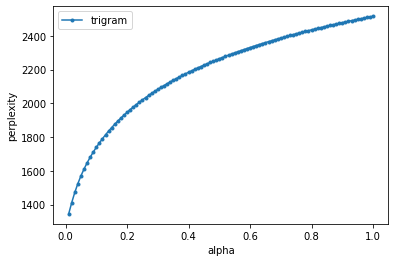

In [10]:
# hyperparamter tuning, CV
alphas = [x*0.01 for x in range(1,101)]
pps = []
for alpha in alphas:
  # TODO: estimate LMs!
    n = 0
    avg_pp = 0.0
    for i, data in cv_folds.items():
        train, test = data
        LM = lm.LanguageModel(train, test, 3, alpha)
        pp = LM.perplexity(test)
        avg_pp += pp
        n += 1
    avg_pp = avg_pp/n
    pps.append(avg_pp)

# TODO: plot!
exercise_3.plot_pp_vs_alpha(pps, alphas, "trigram")

* Repeat the tuning process for unigram and bigram language models. Does your estimate of $\alpha$ differ? Why? (0.5 points)

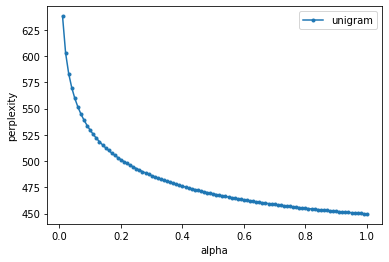

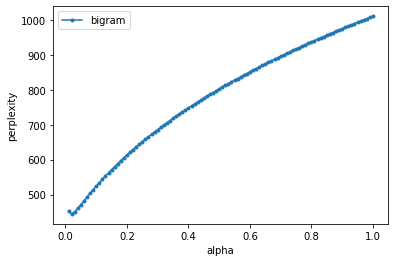

In [11]:
# hyperparamter tuning, bigram + trigram

uni_pps = []
bi_pps = []

for alpha in alphas:
  # TODO: estimate LMs!
    n = 0
    avg_pp = 0.0
    uni_pp = 0.0
    bi_pp = 0.0
    for i, data in cv_folds.items():
        train, test = data
        
        LM1 = lm.LanguageModel(train, test, 1, alpha)
        uni_pp += LM1.perplexity(test)
        
        LM2 = lm.LanguageModel(train, test, 2, alpha)
        bi_pp += LM2.perplexity(test)
        
        #avg_pp += pp
        n += 1
    uni_pp = uni_pp / n
    bi_pp = bi_pp / n
    
    uni_pps.append(uni_pp)
    bi_pps.append(bi_pp)

# TODO: plot!
exercise_3.plot_pp_vs_alpha(uni_pps, alphas, "unigram")
exercise_3.plot_pp_vs_alpha(bi_pps, alphas, "bigram")

## Exercise 3: Cross-Validation (Answers)

**3.1**

No, this does not represent an unbiased estimate of the model's capacity.

**3.2**

Yes, the average score differs because we are getting the unbiased estimates of the model's capacity. Using K-validation fold with different test and train set may contribute to more unbiased value and different form previous value.

**3.3**

Yes, estimate of $\alpha$ differ because we are tuning different language models.